## Using Fourier Transforms and Filters for Computer Vision (edge Detection)

Here I will show how to load an image and apply a couple of kernels for edge detection and then proceed to plot Fourier Transform images for a picture.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define sobel (edge) filters



sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])


Now lets load an image from or working directory...

In [36]:
## TODO: load in an image, and filter it using a kernel of your choice

image = cv2.imread("images/Rome_Luis.jpg")

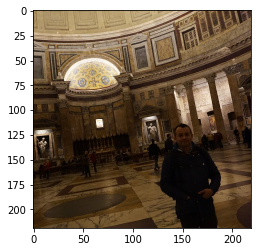

In [37]:
image_copy = np.copy(image)
# changing color to RGB from BGR
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [38]:
# turning image to gray before applying filter
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

In [39]:
# applying gaussian blur 
gray_blur = cv2.GaussianBlur(gray,(9,9),0)

In [40]:
#now applying the sobel x filter
filtered = cv2.filter2D(gray_blur,-1,sobel_x)

In [41]:
def ft_image(norm_image):
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx

In [42]:

gray_norm  = gray/255.0
ft_image_gray_norm = ft_image(gray_norm)





In [43]:
gray_blur_norm = gray_blur/255.0
ft_image_gray_blur = ft_image(gray_blur_norm)

In [44]:
filtered_norm = filtered/255.0
ft_image_sobelx = ft_image(filtered_norm)


In [45]:
# applying sobel y
filtered_sobel_y = cv2.filter2D(gray_blur,-1,sobel_y)
filtered_sobel_y_norm = filtered_sobel_y/255
ft_image_sobel_y = ft_image(filtered_sobel_y_norm)

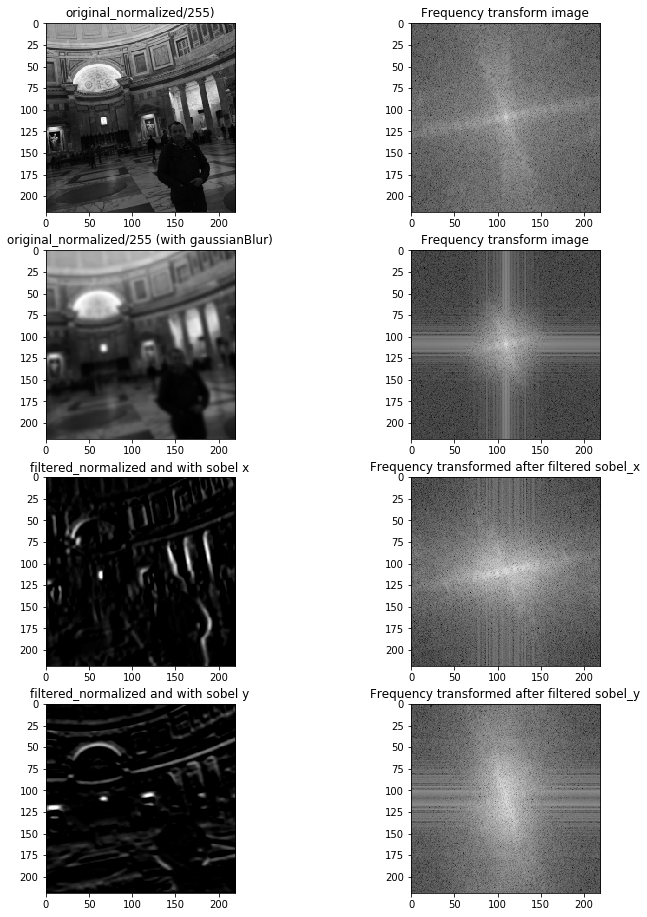

In [46]:
f,  ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8)) =  plt.subplots(4,2,figsize=(12,16))

ax1.set_title('original_normalized/255)')
ax1.imshow(gray_norm,cmap='gray' )
ax2.set_title('Frequency transform image')
ax2.imshow(ft_image_gray_norm,cmap='gray')
ax3.set_title('original_normalized/255 (with gaussianBlur)')
ax3.imshow(gray_blur_norm,cmap='gray')
ax4.set_title('Frequency transform image')
ax4.imshow(ft_image_gray_blur,cmap='gray')
ax5.set_title('filtered_normalized and with sobel x')
ax5.imshow(filtered_norm,cmap='gray')
ax6.set_title('Frequency transformed after filtered sobel_x')
ax6.imshow(ft_image_sobelx,cmap='gray')
ax7.set_title('filtered_normalized and with sobel y')
ax7.imshow(filtered_sobel_y_norm,cmap='gray')
ax8.set_title('Frequency transformed after filtered sobel_y')
ax8.imshow(ft_image_sobel_y,cmap='gray')